In [1]:
# manipulacja danymi
import numpy as np
import pandas as pd

# wizualizacja danych
import matplotlib.pyplot as plt
import seaborn as sns

# statystyczna analiza danych
from scipy import stats

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
dataset = pd.read_csv('titanic.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
fare_values = dataset.loc[dataset['Fare'].notnull(), 'Fare'].values
print(fare_values.shape)

(891,)


In [27]:
mean_fare = np.round(np.mean(fare_values))
print(f'Średnia opłata to: {mean_fare}')

Średnia opłata to: 32.0


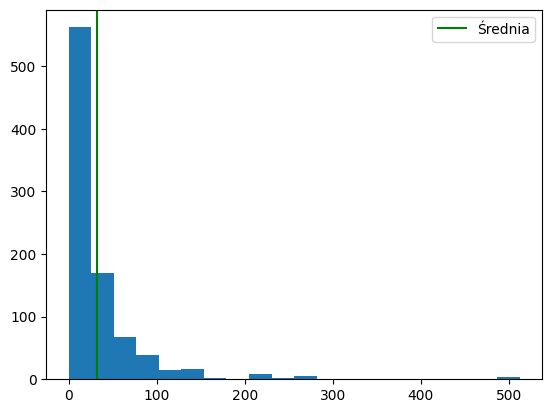

In [8]:
plt.hist(fare_values, bins=20)
plt.axvline(x=mean_fare, color='green', label='Średnia')
plt.legend(loc='upper right')
plt.show()

In [28]:
median_fare = np.median(fare_values)
print(f'Mediana opłaty to: {median_fare}')

Mediana opłaty to: 14.4542


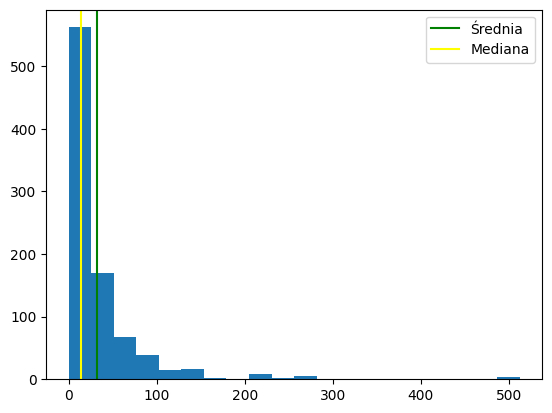

In [13]:
plt.hist(fare_values, bins=20)
plt.axvline(x=mean_fare, color='green', label='Średnia')
plt.axvline(x=median_fare, color='yellow', label='Mediana')
plt.legend(loc='upper right')
plt.show()

In [29]:
mode_fare = stats.mode(fare_values)
print(f'Najwięcej opłat było w kwotach: {mode_fare}')

Najwięcej opłat było w kwotach: ModeResult(mode=np.float64(8.05), count=np.int64(43))


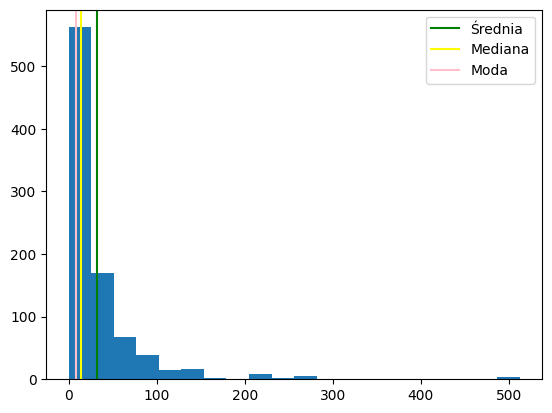

In [19]:
plt.hist(fare_values, bins=20)
plt.axvline(x=mean_fare, color='green', label='Średnia')
plt.axvline(x=median_fare, color='yellow', label='Mediana')
plt.axvline(x=mode_fare[0], color='pink', label='Moda')
plt.legend(loc='upper right')
plt.show()

In [32]:
q0 = np.quantile(fare_values, 0.0)
q1 = np.round(np.quantile(fare_values, 0.25))
q3 = np.round(np.quantile(fare_values, 0.75))
q4 = np.round(np.quantile(fare_values, 1.0))
print(f'Wartość min opłaty czyli Q0 to: {q0}')
print(f'25% mniejszych wartości opłaty gdzie 75% to większe wartości to Q1: {q1}')
print(f'25% większych wartości opłaty gdzie 75% to mniejsze wartości to Q3: {q3}')
print(f'Wartość max opłaty czyli Q4 to: {q4}')

Wartość min opłaty czyli Q0 to: 0.0
25% mniejszych wartości opłaty gdzie 75% to większe wartości to Q1: 8.0
25% większych wartości opłaty gdzie 75% to mniejsze wartości to Q3: 31.0
Wartość max opłaty czyli Q4 to: 512.0


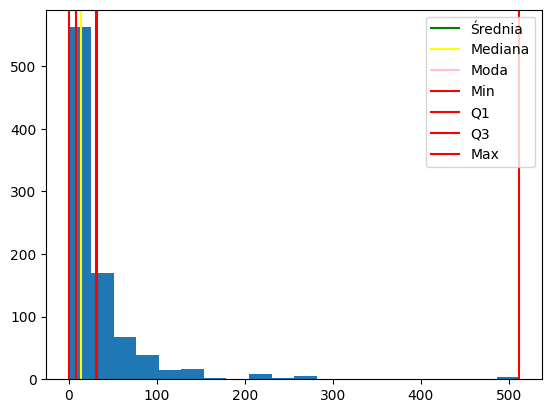

In [21]:
plt.hist(fare_values, bins=20)
plt.axvline(x=mean_fare, color='green', label='Średnia')
plt.axvline(x=median_fare, color='yellow', label='Mediana')
plt.axvline(x=mode_fare[0], color='pink', label='Moda')
plt.axvline(x=q0, color='red', label='Min')
plt.axvline(x=q1, color='red', label='Q1')
plt.axvline(x=q3, color='red', label='Q3')
plt.axvline(x=q4, color='red', label='Max')
plt.legend(loc='upper right')
plt.show()

In [33]:
iqr = q3-q1
print(f'Rozstęp międzykwartylowy czyli zakres między percentylem 25 a 75 to: {iqr}')

Rozstęp międzykwartylowy czyli zakres między percentylem 25 a 75 to: 23.0


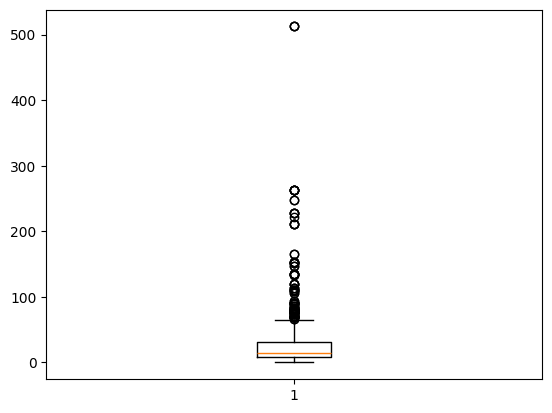

In [34]:
plt.boxplot(fare_values)
plt.show()

In [35]:
variance_fare = np.var(fare_values, ddof=1)
print(f'Wariancja wynosi: {variance_fare}')

Wariancja wynosi: 2469.436845743116


In [36]:
print(f'Odchylenie standardowe wynosi: {(variance_fare**(1/2))}')

Odchylenie standardowe wynosi: 49.6934285971809


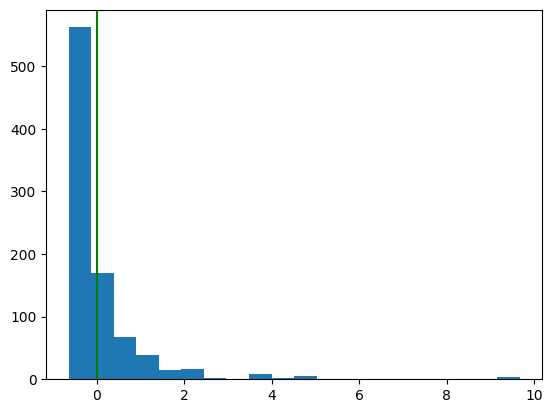

Średnia: 3.987332972840069e-18
Odchylenie standardowe: 1.0005616400330457


In [39]:
scaler_standardized = StandardScaler()
standardized_fare_values = scaler_standardized.fit_transform(fare_values.reshape(-1,1))
plt.hist(standardized_fare_values, bins=20)
plt.axvline(x=standardized_fare_values.mean(), color='green', label='Średnia')
plt.show()
print(f'Średnia: {standardized_fare_values.mean()}')
print(f'Odchylenie standardowe: {np.std(standardized_fare_values, ddof=1)}')

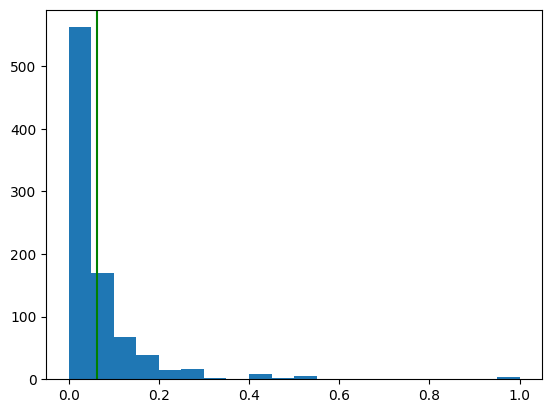

Średnia: 0.06285842768394742
Odchylenie standardowe: 0.09699511290236998


In [42]:
scaler_MinMax = MinMaxScaler()
normalized_fare_values = scaler_MinMax.fit_transform(fare_values.reshape(-1,1))
plt.hist(normalized_fare_values, bins=20)
plt.axvline(x=normalized_fare_values.mean(), color='green', label='Średnia')
plt.show()
print(f'Średnia: {normalized_fare_values.mean()}')
print(f'Odchylenie standardowe: {np.std(normalized_fare_values, ddof=1)}')

Podsumowanie: 891 osób wniosło opłatę za bilet, średnia opłata za bilet na Titanicu wynosiła 32. Z kolei wartość środkowa to 14.4542 co oznacza że połowa pasażerów zapłaciła więcej a połowa mniej. Najwięcej opłat było w kwotach 8.05 i 43. Wartość minimalna opłaty wynosiła 0, pierwszy kwartyl czyli 25% mniejszych wartości opłaty gdzie 75% to większe wartości wynosił 8, trzeci kwartyl czyli 25% większych wartości opłaty gdzie 75% to mniejsze wartości wynosił 31, a wartość opłaty maksymalnej to 512. Analizując wykres pudełkowy: najwięcej opłat było w niskicha wartościach, zbliżonych do średniej ale są punkty odstające które świadczą o ogonie wysokich opłatach za bilet, znacznie oddalonych od średniej. Istotny jest rozstęp międzykwartylowy który mówi nam o środkowej części danych między pierwszym a trzecim kwartylem i jest to opłata wynosząca 23. Odchylenie standardowe wynosi: 49.6934285971809, co oznacza że dane są dość mocno zróżnicowane, rozproszone i oddalone od średniej. Rozrzut danych w tym przypadku świadczy o oddalonych, skrajnych wartościach maksymalnych, dalej oznacza to to że w opłatach były osoby które zapłaciły bardzo mało ale tez takie które zapłaciły nieporównywalnie więcej. Uważam też że skalowanie standardowe czy minmax w tym przypadku jest zbędne, czy myle się?